In [34]:
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [73]:
train_df = pd.read_csv("hack_data.csv")

In [74]:
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X47,Learner Type,Target Population,Tar_3a,PLE
0,0,1,1,1,1,1,0,1,0,0,...,4,2,3,1,4,5,Teacher,Disability,0,0
1,1,0,0,0,1,0,1,0,0,1,...,1,5,5,3,4,3,Child,woman,1,2
2,0,0,0,0,1,0,1,0,1,0,...,3,3,1,2,2,3,Teacher,Disability,0,1
3,1,1,1,1,1,0,1,1,0,1,...,4,1,3,2,2,1,Child,Disability,0,0
4,1,1,0,1,0,0,1,0,0,1,...,3,1,3,3,2,4,Teacher,woman,0,2


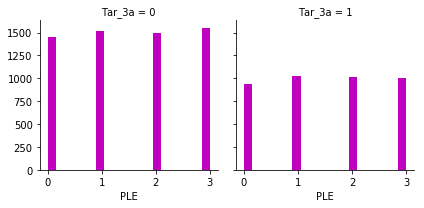

In [79]:
g = sns.FacetGrid(train_df,col = 'Tar_3a')
g.map(plt.hist,'PLE',bins = 20, color = "m")

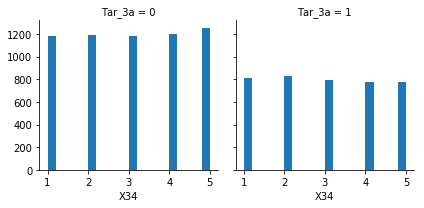

In [84]:
g = sns.FacetGrid(train_df,col = 'Tar_3a')
g.map(plt.hist,'X34',bins = 20)

In [87]:
train_df[train_df['Tar_3a'] == 1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X47,Learner Type,Target Population,Tar_3a,PLE
1,1,0,0,0,1,0,1,0,0,1,...,1,5,5,3,4,3,Child,woman,1,2
7,0,0,0,1,1,1,1,0,0,1,...,2,2,1,5,4,5,Adult,indigenous,1,3
9,1,1,1,0,1,0,0,0,0,1,...,2,5,2,1,4,2,Adult,indigenous,1,2
13,0,1,0,1,0,1,1,0,0,0,...,1,5,5,2,5,2,Teacher,visible minority,1,1
14,1,1,0,0,1,0,1,1,1,0,...,5,3,2,1,5,4,Child,woman,1,3
16,1,1,0,0,1,0,0,0,0,0,...,5,2,4,5,2,1,Teacher,Rural,1,0
17,0,0,0,0,0,0,1,1,0,0,...,2,3,2,1,4,5,Adult,Rural,1,3
20,0,1,0,1,1,1,0,1,0,0,...,5,3,3,1,1,2,Adult,Rural,1,0
23,0,0,0,1,1,0,1,1,1,1,...,5,3,2,3,1,3,Teacher,woman,1,0
26,0,0,1,0,0,1,0,0,0,1,...,3,3,5,2,2,5,Youth,indigenous,1,3


In [ ]:
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, train_df[train_df['Tar_3a'] == 1], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [38]:
learner_type = pd.get_dummies( train_df['Learner Type'] , prefix='learner_type')
learner_type

,learner_type_Adult,learner_type_Child,learner_type_Teacher,learner_type_Youth
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
5,0,0,0,1
6,0,0,0,1
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [39]:
target_population = pd.get_dummies( train_df['Target Population'] , prefix='target_population')
target_population

,target_population_Disability,target_population_Rural,target_population_indigenous,target_population_visible minority,target_population_woman
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,1,0,0,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,0,0,1
9,0,0,1,0,0


In [40]:
train_df = train_df.drop(['Learner Type', 'Target Population'],axis=1)

In [41]:
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X39,X40,X41,X42,X43,X44,X45,X47,Tar_3a,PLE
0,0,1,1,1,1,1,0,1,0,0,...,3,1,4,2,3,1,4,5,0,0
1,1,0,0,0,1,0,1,0,0,1,...,1,2,1,5,5,3,4,3,1,2
2,0,0,0,0,1,0,1,0,1,0,...,2,4,3,3,1,2,2,3,0,1
3,1,1,1,1,1,0,1,1,0,1,...,1,1,4,1,3,2,2,1,0,0
4,1,1,0,1,0,0,1,0,0,1,...,2,4,3,1,3,3,2,4,0,2


In [42]:
train_df = pd.concat([train_df, learner_type, target_population], axis = 1)
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,PLE,learner_type_Adult,learner_type_Child,learner_type_Teacher,learner_type_Youth,target_population_Disability,target_population_Rural,target_population_indigenous,target_population_visible minority,target_population_woman
0,0,1,1,1,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,1,0,1,0,0,1,...,2,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
3,1,1,1,1,1,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0
4,1,1,0,1,0,0,1,0,0,1,...,2,0,0,1,0,0,0,0,0,1


In [43]:
train_y = train_df.Tar_3a
train_y.head()
train_df = train_df.drop(['Tar_3a'],axis=1)

In [44]:
train_X = train_df[ 0:7000 ]
train_X.shape

(7000, 54)

In [45]:
test_X = train_df[7000:]
test_X.shape

(2999, 54)

In [46]:
test_y = train_y[7000:]

In [47]:
test_y.shape

(2999L,)

In [48]:
train_y = train_y[0:7000]
train_y.shape

(7000L,)

# Logistic Regression 

In [49]:
logreg = LogisticRegression()
cross_logreg_score = cross_val_score(logreg, train_X, train_y, cv=10, scoring='accuracy')
logreg_score = cross_logreg_score.mean()
print(logreg_score)

0.5961420801733415


In [50]:
# create the RFE model and select 3 attributes
rfe = RFE(logreg, 10)
rfe = rfe.fit(train_X, train_y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False  True False False False False False
 False  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False  True False  True False  True]
[ 4  3  1 10  1 38  1 27  6  2 16  9 43  1  8  5 33  1  7 44 17 25 34 12
 41 24 19 11 14 42 20 45 13 26 40 21 31 22 36 35 32 18 15 37 30  1 29  1
 28  1 23  1 39  1]


# K-Nearest Neighbors Model

In [51]:
k_range = list(range(1,11))
weight_options = ['uniform','distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
knn_grid.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [52]:
knn_score = knn_grid.best_score_
print(knn_score)
print(knn_grid.best_params_)

0.575142857143
{'n_neighbors': 10, 'weights': 'uniform'}


# SVM

In [53]:
svc = SVC()
cross_svc_score = cross_val_score(svc, train_X, train_y, cv=10, scoring='accuracy')
svc_score = cross_svc_score.mean()
print(svc_score)

0.5895718743449331


# Decision Tree

In [54]:
decision_tree = DecisionTreeClassifier()
cross_decision_tree_score = cross_val_score(decision_tree, train_X, train_y, cv=10, scoring='accuracy')
decision_tree_score = cross_decision_tree_score.mean()
print(decision_tree_score)

0.5104265390629077


In [64]:
model = ExtraTreesClassifier()
model.fit(train_X, train_y)
# display the relative importance of each attribute
print(model.feature_importances_)
lst_feature_imp = [model.feature_importances_]
feature_importance  = pd.DataFrame(lst_feature_imp, columns = train_X.columns.tolist())

[0.01779411 0.01569631 0.01240439 0.01736292 0.01465357 0.01735215
 0.01354155 0.0168752  0.017342   0.01891545 0.01627721 0.01506139
 0.01872414 0.01255347 0.01632398 0.01715912 0.01825768 0.016328
 0.02222686 0.0227075  0.02456805 0.02317306 0.02169938 0.02174238
 0.02250958 0.02121938 0.02213973 0.02277656 0.02077259 0.02290527
 0.02392893 0.02184206 0.02531791 0.02426363 0.02100038 0.02351711
 0.02056538 0.02116015 0.02618523 0.0201936  0.0210338  0.02335983
 0.0222079  0.02256732 0.0218662  0.01222795 0.01193268 0.01079477
 0.01078309 0.00944166 0.01134623 0.01187475 0.01038351 0.01114296]


In [66]:
feature_importance.to_csv("feature_importances.csv")

# Random Forest

In [67]:
estimator_range = list(range(1,6))
param_grid = dict(n_estimators = estimator_range)
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, param_grid, cv = 10, scoring = 'accuracy')
random_forest_grid.fit(train_X, train_y)
random_forest_score = random_forest_grid.best_score_
print(random_forest_score)
print(random_forest_grid.best_params_)

0.563857142857
{'n_estimators': 2}


# Gaussian Naive Bayes

In [68]:
gaussian = GaussianNB()
cross_gaussian_score = cross_val_score(gaussian, train_X, train_y, cv=5, scoring='accuracy')
gaussian_score = cross_gaussian_score.mean()
print(gaussian_score)

0.5884268553927106


# Linear SVC 

In [69]:
linear_svc = LinearSVC()
cross_linear_svc_score = cross_val_score(linear_svc, train_X, train_y, cv=5, scoring='accuracy')
linear_svc_score = cross_linear_svc_score.mean()
print(linear_svc_score)

0.5490186803302304


# Stochastic Gradient Descent

In [70]:
sgd = SGDClassifier()
cross_sgd_score = cross_val_score(sgd, train_X, train_y, cv=5, scoring='accuracy')
sgd_score = cross_sgd_score.mean()
print(sgd_score)

0.52799991807576


# XGBoost

In [71]:
depth_range = list(range(1,6))
estimator_range = list(range(1,6))
param_grid = dict(max_depth = depth_range, n_estimators = estimator_range)
gbm = xgb.XGBClassifier(learning_rate=0.05)
gbm_grid = GridSearchCV(gbm, param_grid, cv = 5, scoring = 'accuracy')
gbm_grid.fit(train_X, train_y)
gbm_score = gbm_grid.best_score_
print(gbm_score)
print(gbm_grid.best_params_)

C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocess

C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocess

C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocess

C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocess

C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocess

0.598714285714
{'n_estimators': 1, 'max_depth': 1}


C:\Users\s1061722\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Summary

In [72]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XGBoost'],
    'Score': [svc_score, knn_score, logreg_score, 
              random_forest_score, gaussian_score, 
              sgd_score, linear_svc_score, decision_tree_score, gbm_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,XGBoost,0.598714
2,Logistic Regression,0.596142
0,Support Vector Machines,0.589572
4,Naive Bayes,0.588427
1,KNN,0.575143
3,Random Forest,0.563857
6,Linear SVC,0.549019
5,Stochastic Gradient Decent,0.528000
7,Decision Tree,0.510427
